In [7]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '9e1921c4-e460-4c81-8bae-d8d8542ba1fc',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [8]:
type(data)

dict

In [9]:
import pandas as pd


#This allows you to see all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11491,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.971929e+07,1.971929e+07,False,NaN,1,NaN,NaN,None,2024-07-02T16:03:00.000Z,61816.174487,2.284215e+10,-4.9972,-0.342198,-1.932772,-0.142900,-9.237045,0.025387,-6.288906,1.218971e+12,53.2617,1.298140e+12,None,2024-07-02T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 16:05:20.859354+00:00
1,1027,Ethereum,ETH,ethereum,9116,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201914e+08,1.201914e+08,True,NaN,2,NaN,NaN,None,2024-07-02T16:03:00.000Z,3409.787744,1.056023e+10,-10.9274,0.011345,-1.667932,-0.360798,-10.245617,10.688214,2.233849,4.098272e+11,17.9070,4.098272e+11,None,2024-07-02T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 16:05:20.859354+00:00
2,825,Tether USDt,USDT,tether,90752,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.127873e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-02T16:03:00.000Z,0.998725,4.215261e+10,-5.9652,0.000590,0.006128,-0.082435,-0.041947,-0.143889,-0.139121,1.126435e+11,4.9218,1.159289e+11,None,2024-07-02T16:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-02 16:05:20.859354+00:00
3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475831e+08,1.475831e+08,False,NaN,4,NaN,NaN,None,2024-07-02T16:03:00.000Z,574.883011,1.512406e+09,-9.9291,-0.176568,-0.372408,-0.499633,-4.355994,-0.579679,3.230757,8.484301e+10,3.7071,8.484301e+10,None,2024-07-02T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 16:05:20.859354+00:00
4,5426,Solana,SOL,solana,697,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.627792e+08,5.793827e+08,True,NaN,5,NaN,NaN,None,2024-07-02T16:03:00.000Z,148.128071,1.772716e+09,-5.0468,-0.078517,-0.231005,6.247739,-10.273762,4.088355,-21.738707,6.855059e+10,2.9952,8.582284e+10,None,2024-07-02T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 16:05:20.859354+00:00


In [11]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9e1921c4-e460-4c81-8bae-d8d8542ba1fc',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
    # for dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now', utc=True)
    df = df.append(df2)

    

    if not os.path.isfile(r'C:\Users\Douik\Desktop\analytics\data analyst project\API.csv'):
        df.to_csv(r'C:\Users\Douik\Desktop\analytics\data analyst project\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Douik\Desktop\analytics\data analyst project\API.csv', mode='a', header=False)




In [12]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1240\2343590944.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1240\2343590944.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1240\2343590944.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_1240\2343590944.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [13]:
df99 = pd.read_csv(r'C:\Users\Douik\Desktop\analytics\data analyst project\API.csv')
df99.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11491,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.971929e+07,1.971929e+07,False,NaN,1,NaN,NaN,NaN,2024-07-02T16:03:00.000Z,61816.174487,2.284215e+10,-4.9972,-0.342198,-1.932772,-0.142900,-9.237045,0.025387,-6.288906,1.218971e+12,53.2617,1.298140e+12,NaN,2024-07-02T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 16:05:20.859354+00:00
1,1,1027,Ethereum,ETH,ethereum,9116,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201914e+08,1.201914e+08,True,NaN,2,NaN,NaN,NaN,2024-07-02T16:03:00.000Z,3409.787744,1.056023e+10,-10.9274,0.011345,-1.667932,-0.360798,-10.245617,10.688214,2.233849,4.098272e+11,17.9070,4.098272e+11,NaN,2024-07-02T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 16:05:20.859354+00:00
2,2,825,Tether USDt,USDT,tether,90752,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.127873e+11,1.160769e+11,True,NaN,3,NaN,NaN,NaN,2024-07-02T16:03:00.000Z,0.998725,4.215261e+10,-5.9652,0.000590,0.006128,-0.082435,-0.041947,-0.143889,-0.139121,1.126435e+11,4.9218,1.159289e+11,NaN,2024-07-02T16:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-02 16:05:20.859354+00:00
3,3,1839,BNB,BNB,bnb,2188,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475831e+08,1.475831e+08,False,NaN,4,NaN,NaN,NaN,2024-07-02T16:03:00.000Z,574.883011,1.512406e+09,-9.9291,-0.176568,-0.372408,-0.499633,-4.355994,-0.579679,3.230757,8.484301e+10,3.7071,8.484301e+10,NaN,2024-07-02T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 16:05:20.859354+00:00
4,4,5426,Solana,SOL,solana,697,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.627792e+08,5.793827e+08,True,NaN,5,NaN,NaN,NaN,2024-07-02T16:03:00.000Z,148.128071,1.772716e+09,-5.0468,-0.078517,-0.231005,6.247739,-10.273762,4.088355,-21.738707,6.855059e+10,2.9952,8.582284e+10,NaN,2024-07-02T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-02 16:05:20.859354+00:00


In [15]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3.head()

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.297120,-1.797632,-0.021009,-9.236846,0.016239,-6.312789
Ethereum,0.018772,-1.587116,-0.281025,-10.255572,10.642757,2.078178
Tether USDt,0.010273,0.010660,-0.093689,-0.040669,-0.150670,-0.137013
BNB,-0.230596,-0.352734,-0.548737,-4.394837,-0.622486,3.133485
Solana,-0.244207,-0.326883,6.196786,-10.342123,3.956210,-21.876356


In [16]:
df4 = df3.stack()
df4.head()

name                                 
Bitcoin  quote.USD.percent_change_1h    -0.297120
         quote.USD.percent_change_24h   -1.797632
         quote.USD.percent_change_7d    -0.021009
         quote.USD.percent_change_30d   -9.236846
         quote.USD.percent_change_60d    0.016239
dtype: float64

In [17]:
type(df4)

pandas.core.series.Series

In [18]:
df5 = df4.to_frame(name='values')
df5.head()

values
name                                          
Bitcoin quote.USD.percent_change_1h  -0.297120
        quote.USD.percent_change_24h -1.797632
        quote.USD.percent_change_7d  -0.021009
        quote.USD.percent_change_30d -9.236846
        quote.USD.percent_change_60d  0.016239

In [19]:
df5.count()

values    90
dtype: int64

In [20]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6.head()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.297120
1,Bitcoin,quote.USD.percent_change_24h,-1.797632
2,Bitcoin,quote.USD.percent_change_7d,-0.021009
3,Bitcoin,quote.USD.percent_change_30d,-9.236846
4,Bitcoin,quote.USD.percent_change_60d,0.016239


In [21]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.297120
1,Bitcoin,quote.USD.percent_change_24h,-1.797632
2,Bitcoin,quote.USD.percent_change_7d,-0.021009
3,Bitcoin,quote.USD.percent_change_30d,-9.236846
4,Bitcoin,quote.USD.percent_change_60d,0.016239


In [22]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7.head()

,name,percent_change,values
0,Bitcoin,1h,-0.297120
1,Bitcoin,24h,-1.797632
2,Bitcoin,7d,-0.021009
3,Bitcoin,30d,-9.236846
4,Bitcoin,60d,0.016239


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

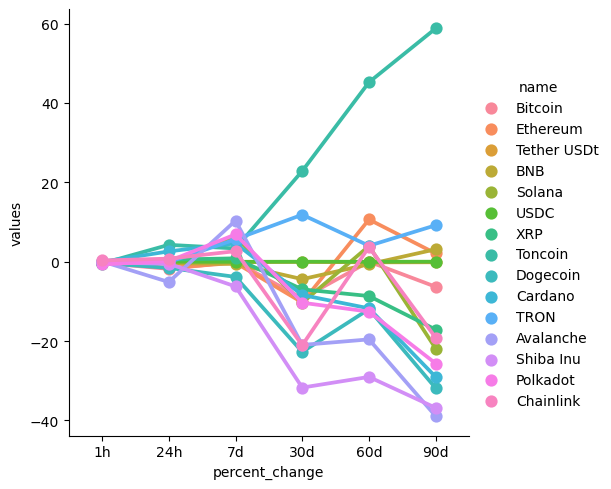

In [24]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [25]:
# we are going to create a dataframe with the columns we want

df10 = df99[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10.head()

,name,quote.USD.price,timestamp
0,Bitcoin,61816.174487,2024-07-02 16:05:20.859354+00:00
15,Bitcoin,61816.174487,2024-07-02 16:05:23.830339+00:00
30,Bitcoin,61829.486614,2024-07-02 16:06:24.505127+00:00
45,Bitcoin,61816.174487,2024-07-02 16:05:20.859354+00:00
60,Bitcoin,61816.174487,2024-07-02 16:05:23.830339+00:00


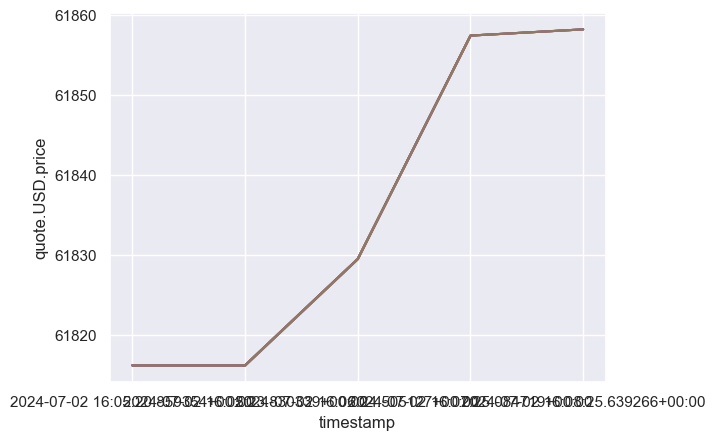

In [31]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)
plt.show()